# Convolutional Neural Networks (CNN)  
In this notebook i demonstrate how 2d Convolutional layer works  

[ref](https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/)  
[filter](https://aishack.in/tutorials/image-convolution-examples/)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Convolutional  

$Imagesize = source - filter +1$

In [3]:
source = np.array([
    [0,1,2,3],
    [10,11,12,13],
    [20,21,22,23],
    [30,31,32,33],
    [40,41,42,43]
])

kernel = np.array([
    [0,1,2],
    [10,11,12],
    [20,21,22]
])

In [4]:
source.shape

(5, 4)

In [5]:
def conv2D(source, kernal):
    return np.sum(source * kernal)

In [6]:
print("Source sub matrix")
print(source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]])
print("Kernel matrix")
print(kernel)
print("Element wise matrix multiply of kernel & source")
print(kernel * source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]])
print("sum of matrix multiply result")
print(np.sum(kernel * source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]]))

Source sub matrix
[[ 0  1  2]
 [10 11 12]
 [20 21 22]]
Kernel matrix
[[ 0  1  2]
 [10 11 12]
 [20 21 22]]
Element wise matrix multiply of kernel & source
[[  0   1   4]
 [100 121 144]
 [400 441 484]]
sum of matrix multiply result
1695


In [7]:
'''
This Function is responsible for slide entire image and return convolutional image
source -> source image numpy matrix
kernel -> numpy kernel matrix
stride and padding is not implemented in this function
'''
def img_slide(source, kernel):
    '''
    Result image size calculation
    row = (source_row - kernel_row + 1)
    column = (source_column - kernel_column + 1)
    '''
    r = 0
    c = 0
    row = (source.shape[0] - kernel.shape[0] + 1)
    column = (source.shape[1] - kernel.shape[1] + 1)
    result_mat = np.zeros((row,column))
    
    while r < row:
        c = 0
        while c < column:
            result_mat[r,c] = conv2D(source[r: r+kernel.shape[0], c : c+kernel.shape[1]], kernel)
            c += 1
        r += 1
    
    return result_mat

In [8]:
img_slide(source,kernel)

array([[1695., 1794.],
       [2685., 2784.],
       [3675., 3774.]])

shape :  (731, 1300)


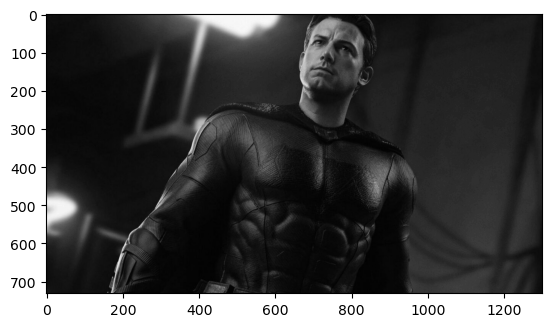

In [9]:
img = cv2.imread("/mnt/Project/mlTask/CNN/assest/batman.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("shape : ",img.shape)
imshow(img)

In [10]:
kernel = np.array(
    [
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
    ]
)

Res img shape :  (729, 1298)


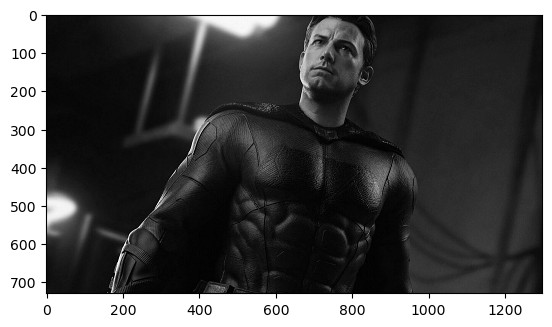

In [11]:
res_img = img_slide(img, kernel)
print("Res img shape : ",res_img.shape)
imshow(res_img)

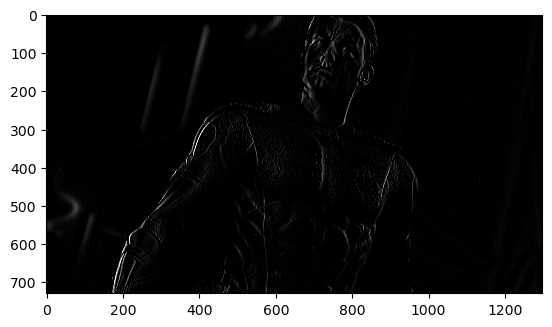

In [12]:
#Vertical edge detect kernal

ver_edge_kernel = np.array(
    [
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
    ]
)
imshow(img_slide(img, ver_edge_kernel))

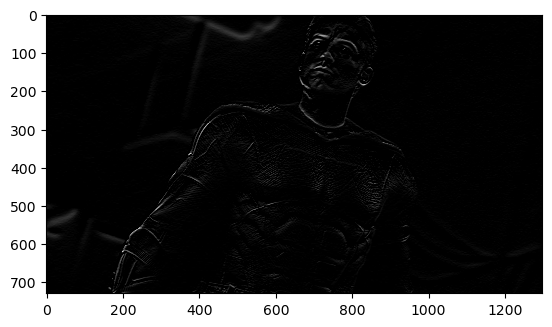

In [13]:
#Horizontal edge detect kernal
hor_edge_kernel = np.array(
    [
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ]
)
imshow(img_slide(img, hor_edge_kernel))

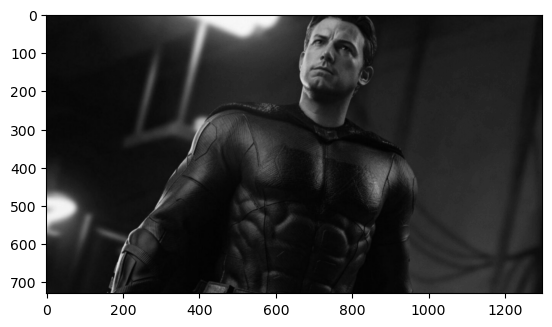

In [14]:
#Gaussian blur kernel
gaus_blur_kernel = np.array(
    [
    [1/16., 1/8., 1/16.],
    [1/8., 1/4., 1/8.],
    [1/16., 1/8., 1/16.]
    ]
)
imshow(img_slide(img, gaus_blur_kernel))

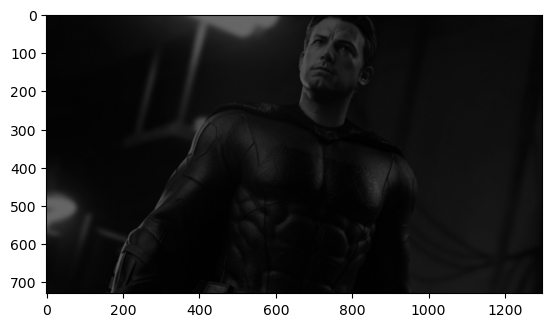

In [15]:
gaus_blur_kernel = np.array(
    [
    [1/32., 1/16., 1/32.],
    [1/16., 1/24., 1/16.],
    [1/33., 1/16., 1/32.]
    ]
)
imshow(img_slide(img, gaus_blur_kernel))

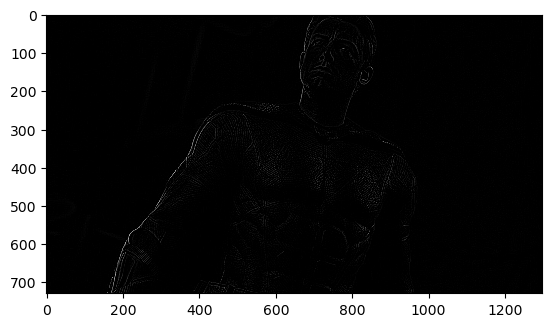

In [16]:
outline_kernel = np.array(
    [
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
    ]
)
imshow(img_slide(img, outline_kernel))

# Padding  
$padding = \frac{filter - 1}{2}$  
$Imagesize = source - filter + (2 * padding)+1$

In [17]:
def padding(source, side=5, pad=1):
    '''
    This function will return padded numpy 2d array based on the options
    source:
        numpy 2d array
    side:
        1 -> add left column
        2 -> add top row
        3 -> add right column
        4 -> add bottom row
        5 -> add all side
        6 -> add left and right column
        7 -> add top and bottom row
        8 -> add left column and top row
        9 -> add right column and bottom row
        10 -> add right column and top row
        11 -> add left column and bottom row
    pad:
        number of rows or column to be pad
    '''
    if side == 5:
        return np.pad(source,(pad),constant_values=0)
    if side == 1 or side == 3 or side == 6 or (side >= 8 and side <= 11):
        dup = np.zeros((source.shape[0],pad),dtype=source.dtype)
        if side == 1 or side == 6 or side == 8 or side == 11:
            source = np.concatenate((dup,source),axis=1)
        if side == 3 or side == 6 or side == 9 or side == 10:
            source = np.concatenate((source,dup),axis=1)
    if side == 2 or side == 4 or side == 7 or (side >= 8 and side <= 11):
        dup = np.zeros((pad,source.shape[1]),dtype=source.dtype)
        if side == 2 or side == 7 or side == 8 or side == 10:
            source = np.concatenate((dup,source))
        if side == 4 or side == 7 or side == 9 or side == 11: 
            source = np.concatenate((source,dup))
    return source


In [18]:
source = np.array([
    [1,1,1],
    [2,2,2],
    [3,3,3]
])

In [19]:
padding(source,1,2)

array([[0, 0, 1, 1, 1],
       [0, 0, 2, 2, 2],
       [0, 0, 3, 3, 3]])

In [20]:
padding(source,2,3)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [21]:
padding(source,3,2)

array([[1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [3, 3, 3, 0, 0]])

In [22]:
padding(source,4,2)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [0, 0, 0],
       [0, 0, 0]])

In [23]:
padding(source,5)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 2, 2, 2, 0],
       [0, 3, 3, 3, 0],
       [0, 0, 0, 0, 0]])

In [24]:
padding(source,5,2)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 2, 2, 2, 0, 0],
       [0, 0, 3, 3, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [25]:
padding(source,6,2)

array([[0, 0, 1, 1, 1, 0, 0],
       [0, 0, 2, 2, 2, 0, 0],
       [0, 0, 3, 3, 3, 0, 0]])

In [26]:
padding(source,7,2)

array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [0, 0, 0],
       [0, 0, 0]])

In [27]:
padding(source,8,2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 2, 2, 2],
       [0, 0, 3, 3, 3]])

In [28]:
padding(source,9,2)

array([[1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [3, 3, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [29]:
padding(source,10,2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [3, 3, 3, 0, 0]])

In [30]:
padding(source,11,2)

array([[0, 0, 1, 1, 1],
       [0, 0, 2, 2, 2],
       [0, 0, 3, 3, 3],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [31]:
'''
Stride is not implemented in this function
'''
def img_slide_with_padding(source, kernel):
    '''
    Result image size calculation
    p_row = (kernel_row - 1) / 2
    p_column = (kernel_column - 1) / 2
    row = (source_row - kernel_row + 1 + (2*p))
    column = (source_column - kernel_column + 1 + (2*p))
    '''
    r = 0
    c = 0
    p_r =  math.floor((kernel.shape[0] - 1 ) / 2)
    p_c =  math.floor((kernel.shape[1] - 1 ) / 2)
    row = (source.shape[0] - kernel.shape[0] + 1 + (2* p_r))
    column = (source.shape[1] - kernel.shape[1] + 1 + (2 * p_c))
    result_mat = np.zeros((row,column))

    source = padding(source,6,p_c)
    source = padding(source,7,p_r)
    
    while r < row:
        c = 0
        while c < column:
            result_mat[r,c] = conv2D(source[r: r+kernel.shape[0], c : c+kernel.shape[1]], kernel)
            c += 1
        r += 1
    
    return result_mat

(731, 1300)


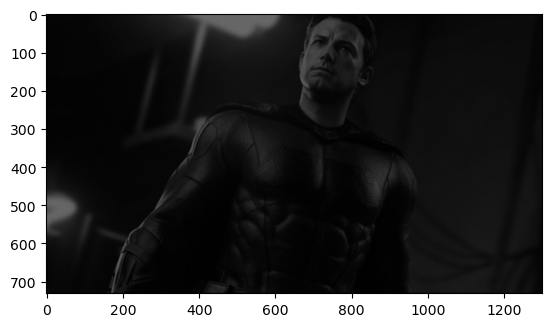

In [32]:
res_img = img_slide_with_padding(img, gaus_blur_kernel)
print(res_img.shape)
imshow(res_img)

In [33]:
tmp = np.array([
    [0,1,2,3],
    [10,11,12,13],
    [20,21,22,23],
    [30,31,32,33],
    [40,41,42,43]
])
tmp_kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
tmp1 = img_slide_with_padding(tmp,tmp_kernel)
print(tmp.shape, tmp1.shape)

(5, 4) (5, 4)


# Stride  


$Imagesize = \lfloor\frac{source - filter }{stride}\rfloor + 1$


In [34]:
def img_slide_with_stride(source, kernel, stride=1):
    '''
    Result image size calculation
    row = math.floor((source_row - kernel_row + 1 )/stride)
    column = math.floor((source_column - kernel_column + 1)/stride)
    '''
    r = 0
    c = 0
    r1 = 0
    c1 = 0
    
    row = math.floor((source.shape[0] - kernel.shape[0])/ stride) + 1
    column = math.floor((source.shape[1] - kernel.shape[1])/ stride ) + 1
    result_mat = np.zeros((row,column))
    
    while r1 < row:
        c = 0
        c1 = 0
        while c1 < column:
            result_mat[r1,c1] = conv2D(source[r: r+kernel.shape[0], c : c+kernel.shape[1]], kernel)
            c += stride
            c1 += 1
        r1 += 1
        r += stride
    
    return result_mat

In [35]:
tmp1 = img_slide_with_stride(tmp,tmp_kernel,2)
print("shape : ",tmp1.shape)

shape :  (2, 1)


(365, 649)


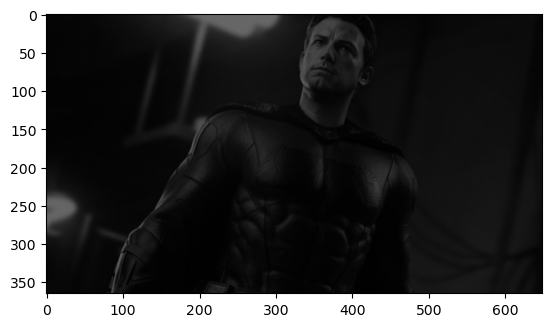

In [36]:
res_img = img_slide_with_stride(img, gaus_blur_kernel,2)
print(res_img.shape)
imshow(res_img)

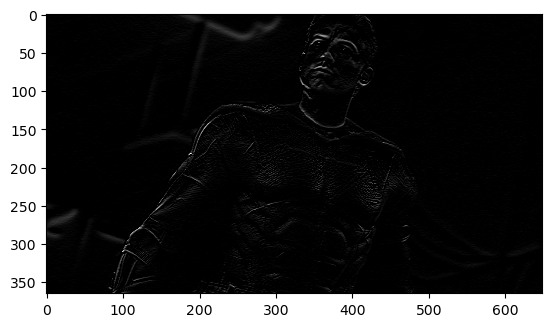

In [37]:
imshow(img_slide_with_stride(img, hor_edge_kernel,2))

# Convolutional Layer  


$Imagesize = \lfloor\frac{source - filter + (2 * padding)}{stride}\rfloor + 1$  
[ref](https://stats.stackexchange.com/questions/297678/how-to-calculate-optimal-zero-padding-for-convolutional-neural-networks)


In [38]:
def convolutional(source, kernel, pad=False, stride=1, sizeRetain=False):
    '''
    Result image size calculation
    p_row = (kernel_row - 1) / 2
    p_column = (kernel_column - 1) / 2
    row = math.floor((source_row - kernel_row + 1 + (2*p))/stride)
    column = math.floor((source_column - kernel_column + 1 + (2*p))/stride)
    '''
    r = r1 = 0
    c = c1 = 0
    if sizeRetain:
        p_r =  math.floor(((stride - 1) * source.shape[0] - stride + kernel.shape[0] + 1 ) / 2) if pad else 0 
        p_c =  math.floor(((stride - 1) * source.shape[1] - stride + kernel.shape[1] + 1 ) / 2) if pad else 0
    else :
        p_r =  math.floor((kernel.shape[0] - 1 ) / 2) if pad else 0
        p_c =  math.floor((kernel.shape[1] - 1 ) / 2) if pad else 0
    # else (non retain) padding calculation is best because when (size retain) padding calculation is used size is retained but details are not retained
    row = math.floor((source.shape[0] - kernel.shape[0]  + (2* p_r))/stride) + 1
    column = math.floor((source.shape[1] - kernel.shape[1] + (2 * p_c))/stride) + 1
    result_mat = np.zeros((row,column))

    if p_c > 0:
        source = padding(source,6,p_c)
    if p_r > 0:
        source = padding(source,7,p_r)
    
    while r1 < row:
        c = c1 = 0
        while c1 < column:
            result_mat[r1,c1] = conv2D(source[r: r+kernel.shape[0], c : c+kernel.shape[1]], kernel)
            c += stride
            c1 +=1
        r1 += 1
        r += stride
    
    return result_mat

non-size retain calc example

(365, 649)


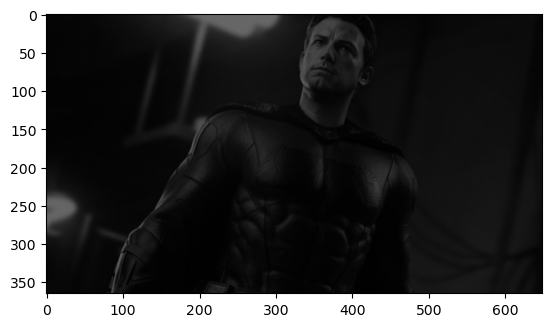

In [39]:
res_img = convolutional(img, gaus_blur_kernel,stride=2)
print(res_img.shape)
imshow(res_img)

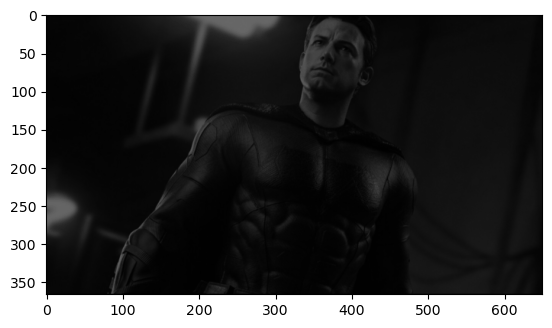

In [40]:
plt.imshow(convolutional(img, gaus_blur_kernel,pad=True,stride=2), cmap='gray', vmin=0, vmax=255)

(731, 1300)


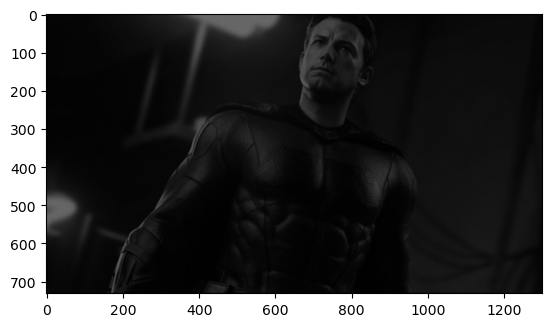

In [41]:
res_img = convolutional(img, gaus_blur_kernel,pad=True)
print(res_img.shape)
imshow(res_img)

size retain calculation example

(365, 649)


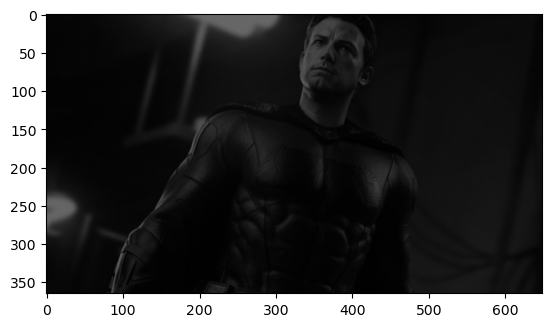

In [42]:
res_img = convolutional(img, gaus_blur_kernel,stride=2,sizeRetain=True)
print(res_img.shape)
imshow(res_img)

(731, 1300)


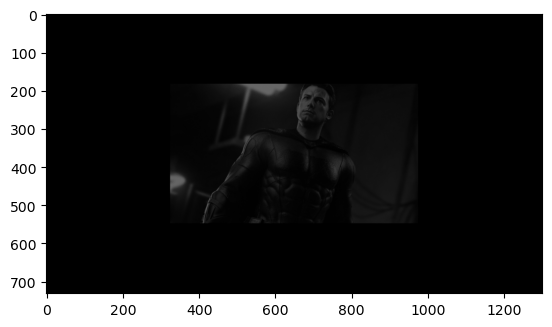

In [43]:
res_img = convolutional(img, gaus_blur_kernel,pad=True,stride=2,sizeRetain=True)
print(res_img.shape)
imshow(res_img)

In [44]:
# del tmp_kernel 
# del tmp1
# del tmp

# Maxpooling

In [45]:
def maxPooling(source, pool, pad=False, stride=1, sizeRetain=False):
    '''
    Result image size calculation
    p_row = (pool_row - 1) / 2
    p_column = (pool_column - 1) / 2
    row = math.floor((source_row - pool_row + 1 + (2*p))/stride)
    column = math.floor((source_column - pool_column + 1 + (2*p))/stride)
    '''
    r = r1 = 0
    c = c1 = 0
    if sizeRetain:
        p_r =  math.floor(((stride - 1) * source.shape[0] - stride + pool[0] + 1 ) / 2) if pad else 0 
        p_c =  math.floor(((stride - 1) * source.shape[1] - stride + pool[1] + 1 ) / 2) if pad else 0
    else :
        p_r =  math.floor((pool[0] - 1 ) / 2) if pad else 0
        p_c =  math.floor((pool[1] - 1 ) / 2) if pad else 0
    row = math.floor((source.shape[0] - pool[0]  + (2* p_r))/stride) + 1
    column = math.floor((source.shape[1] - pool[1] + (2 * p_c))/stride) + 1
    result_mat = np.zeros((row,column))

    if p_c > 0:
        source = padding(source,6,p_c)
    if p_r > 0:
        source = padding(source,7,p_r)
    
    while r1 < row:
        c = c1 = 0
        while c1 < column:
            result_mat[r1,c1] = np.max(source[r: r+pool[0], c : c+pool[1]])
            c += stride
            c1 +=1
        r1 += 1
        r += stride
    
    return result_mat

(365, 649)
(182, 324)


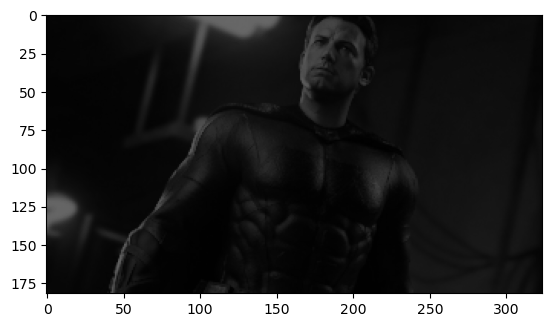

In [46]:
res_img = convolutional(img, gaus_blur_kernel,stride=2,sizeRetain=True)
print(res_img.shape)
res_img = maxPooling(res_img, (2,2), pad=False,stride=2)
print(res_img.shape)
imshow(res_img)

In [47]:
def Relu(source):
    source[source < 0] = 0
    return source

In [48]:
print(Relu(np.array([
    [1,-1,2],
    [0,-9,7],
    [8,9,6]
])))

[[1 0 2]
 [0 0 7]
 [8 9 6]]


(90, 161)
(45, 80)


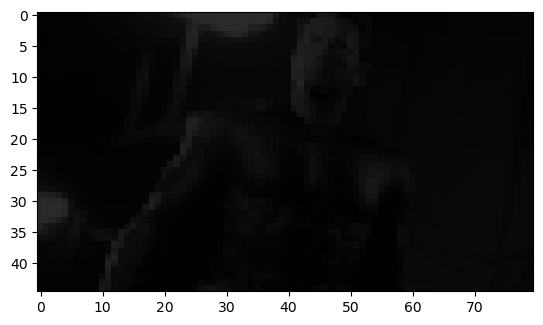

In [49]:
res_img = convolutional(res_img, gaus_blur_kernel,stride=2,sizeRetain=True)
res_img = Relu(res_img)
print(res_img.shape)
res_img = maxPooling(res_img, (2,2), pad=False,stride=2)
print(res_img.shape)
imshow(res_img)

Before Relu


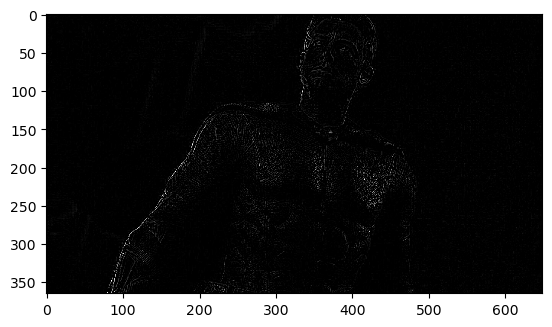

In [50]:
res_img = convolutional(img, outline_kernel,stride=2,sizeRetain=True)
print("Before Relu")
imshow(res_img)

(365, 649)
After Relu


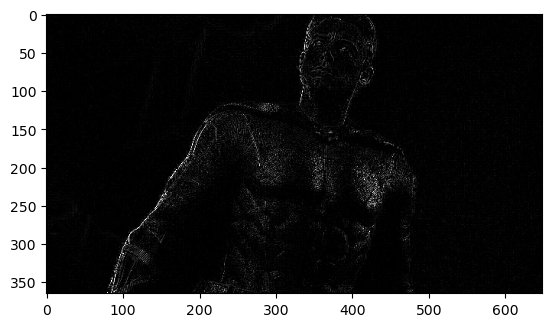

In [51]:
res_img = Relu(res_img)
print(res_img.shape)
print("After Relu")
imshow(res_img)

After Pooling
(182, 324)


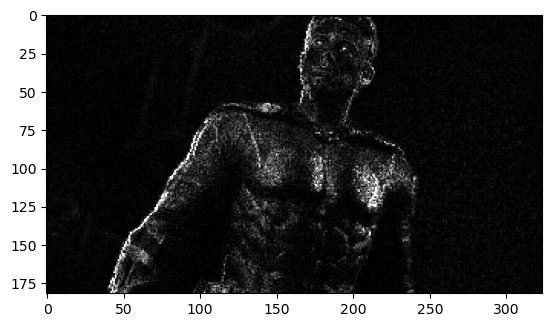

In [52]:
print("After Pooling")
res_img = maxPooling(res_img, (2,2), pad=False,stride=2)
print(res_img.shape)
imshow(res_img)